<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_07_Intruduction_to_deep_learning_for_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convnets

The following listing shows what a basic convnet looks like. It's a stack of *Conv* and *MaxPooling2D layers*. You'll see in a minute exactly what they do. We'll build the model using the *Functional API*, which we introduced in the previous chapter.

**Installing a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # this will give output in the form of rant--3 tensors(3D) , now we need to feed this output to a classifer vectors which are 1D such as dense layer .
x = layers.Flatten()(x) # So t convert 3d output into 1d we used flatten layer before adding dense layer
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 NOTE: a convent takes as input tensors of shape (image height , image width , image channels) , not including batch dimension

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

You can see the output of Conv2D and Maxpooling2D layer is a rank-3 tensor of shape(height , width , channels) . THe width and height are tend to shrink as we gop deper into the model. The numner of channels is controlled by the\\first argument passed to the Conv2D(32,64 or 128).
after the last Con2D layer , we end up with n output of shape(3,3,128).
Next step is to feed output to densly connected vectors .Thes  classifer vectors which are 1D whereas output is rant-3 tensor .So to convert 3d output into 1d we used flatten layer before adding dense layer .

Finally we do 10 ways classification so our last layer has 10 outputs and a softmax activation.

Now lets train the convnets on MNIST dataset.

**Training the convnet on MNIST dataset**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 70s 74ms/step - loss: 0.1662 - accuracy: 0.9486
Epoch 2/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 68s 72ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0178 - accuracy: 0.9945


**Evaluating the convnt**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

NameError: ignored

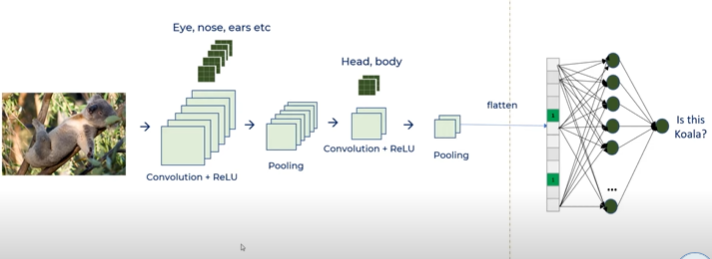

#The Convolutional operation

The fundamental difference between a densely connected layer and a convolution laver is this Dense layers learn global patterns in their input feature space (for exam ple, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns

This key characteristic gives two intresting properties:
1. the pattern they learn are translation-invariant
2.they can learn spatial hieararchies of patterns


Convolutional are defined by two key parameters:
1. Size of patches extracted from the inputs
2. Depth of the output feature map

Note: That the output width and height may differ from the input width and height for two reasons:
1. Border effect , which can be countered by padding the input feature map
2. The use of strides



**Understanding Border effects and padding**

Consider a 5*5 feature map (25 tiles total) . There are only 9 tiles around which you can centre a 3*3 window, forming 3*3 grid, hense the output feature map will be 3*3. It shrinks a little.

If we want to get an output feature map with the same spatial dimension as the input feature map , we can use padding .
padding consists of adding an appropriate number of rows and coulumns on each side of the input feature map so as to make it possible to fit centre convolutional windows around every input file.



**Understanding Convolutional stride**

 The distance between two successive windows is a paramter of the convolution, called as its strides , which is by default is 1 .

**The max pooling operation**

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. A big difference from convolution is that max pooling is usually done with 2*2 windows , and stride 2 , in order to downsample the feature maps by a factor of 2. On the other hand  , convolutional is typically done with 3*3 windows and no stride(stride 1)


**An Incorrectly structured convet missing its max pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

#**Training a convnet from scratch on a small dataset**

**Downloading the data**

Now upload the kaggle.json file

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radhikaramsen","key":"93cb62c99c340787605f80117247ce36"}'}

Install kaggle API client

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


kaggle API client expects the file to be in ~/.kaggle

so move it there

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

we need to set permissions

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

list all available datasets

In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          27455        774  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1918         54  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4468         93  1.0              
mohithsairamreddy/salary-data 

download the dataset

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:11<00:00, 179MB/s]
100% 812M/812M [00:11<00:00, 76.7MB/s]


If your file is a zip file you can unzip with the following code

In [ ]:
!unzip -qq train.zip


After downloading the data we will uncompress it , we will create a new dataset containing three subsets:
1. training set with 1000 samples from each class(cat and dog)
2. validation set with 500 samples from each class
3. test set with 1000 sample from each class

**Copying images to training , validation and test dataset**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_smaller")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)